In [1]:
import re
import numpy as np

In [2]:
class Probe:
    def __init__(self, *velocity):
        self.position = np.array([0, 0], dtype=int)
        self.velocity = np.array([velocity[0], velocity[1]], dtype=int)
    
    def step(self):
        self.position += self.velocity
        self.velocity -= 1
        self.velocity[0] = max(0, self.velocity[0])
    
    @property
    def x(self):
        return self.position[0]

    @property
    def y(self):
        return self.position[1]

In [3]:
data = "target area: x=253..280, y=-73..-46"
m = re.match(r'target area: x=(\d+)..(\d+), y=(-\d+)..(-\d+)', data)
xmin, xmax = int(m[1]), int(m[2])
ymin, ymax = int(m[3]), int(m[4])

In [4]:
def out_out_bounds(probe):
    return True if probe.x > xmax or probe.y < ymin else False

def in_target(probe):
    return True if xmin <= probe.x <= xmax and ymin <= probe.y <= ymax else False

possible_configs = []
for x in range(xmax+1):
    for y in range(ymin, 100):
        probe = Probe(x, y)
        while not out_out_bounds(probe):
            probe.step()
            if in_target(probe):
                possible_configs.append((x, y))
                break

highest = 0
for x, y in possible_configs:
    probe = Probe(x, y)
    while not in_target(probe):
        probe.step()
        highest = max(highest, probe.y)


print(highest)
print(len(possible_configs))

assert(highest == 2628)
assert(len(possible_configs) == 1334)

2628
1334


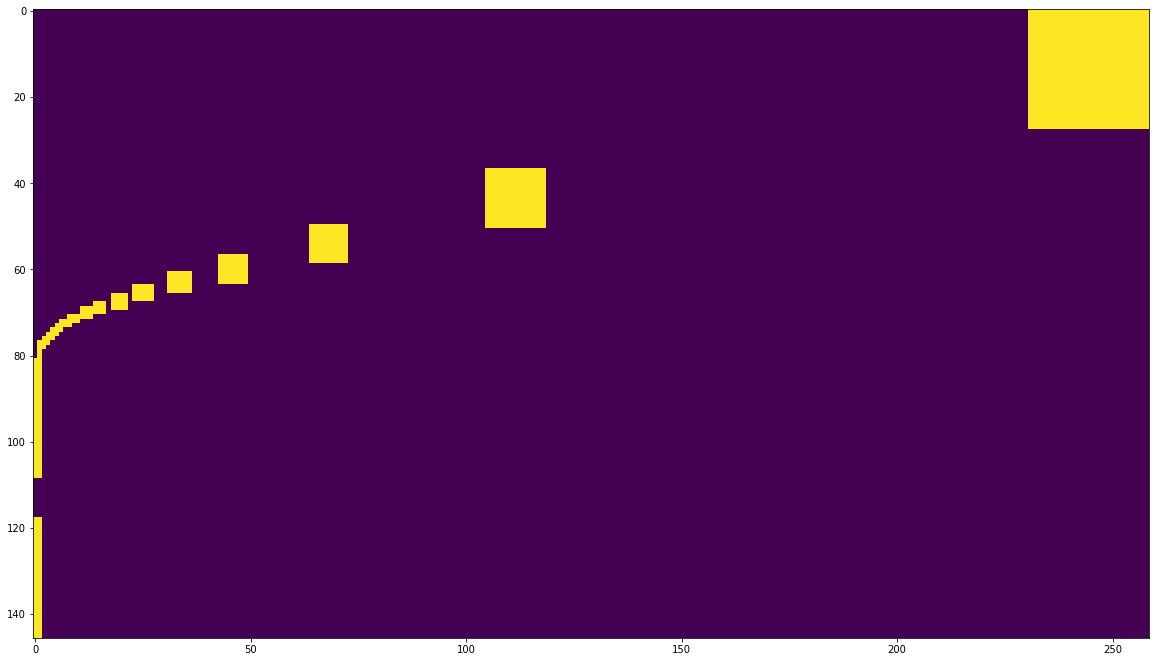

In [5]:
import matplotlib.pyplot as plt

config_xmin = min(x for x, _ in possible_configs)
config_xmax = max(x for x, _ in possible_configs)
config_ymin = min(y for _, y in possible_configs)
config_ymax = max(y for _, y in possible_configs)

parameter_space = np.zeros((config_xmax-config_xmin+1, config_ymax-config_ymin+1), bool)
for x, y in possible_configs:
    parameter_space[x-config_xmin, y-config_ymin] = True

plt.figure(figsize=(20,20))
plt.imshow(parameter_space.T)


In [8]:
data = "target area: x=253..280, y=-73..-46"
y1 = int(re.search(r'y=(-\d+)', data)[1])
y1

-73